In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 32.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
from random import randrange
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("S&P BSE SENSEX.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  for i in range(len(test)):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
kernel_size=[2,3,4,6]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

# Hyperparameter Search

In [ ]:
from random import randrange
from numpy.random import seed

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(4)
  l=randrange(3)
  m=randrange(6)
  n=randrange(3)
  o=randrange(2)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[m])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
124/124 [==============================] - 16s 9ms/step - loss: 0.0525 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1872
Epoch 2/5
124/124 [==============================] - 1s 8ms/step - loss: 0.0037 - accuracy: 2.5323e-04 - mean_absolute_error: 0.0592
Epoch 3/5
124/124 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 2.5323e-04 - mean_absolute_error: 0.0524
Epoch 4/5
124/124 [==============================] - 1s 12ms/step - loss: 0.0026 - accuracy: 2.5323e-04 - mean_absolute_error: 0.0474
Epoch 5/5
18/18 [==============================] - 0s 7ms/step
Epoch: 5 | Inputs: 63 | Kernel: 2 | Dropout: 0 | Loss: huber_loss
RMSE: 0.00524002371943895 | Accuracy: 19.4084580692797
Epoch 1/7
122/122 [==============================] - 8s 16ms/step - loss: 0.0548 - accuracy: 2.5733e-04 - mean_absolute_error: 0.1820
Epoch 2/7
122/122 [==============================] - 2s 13ms/step - loss: 0.0060 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0692
Epoch 3/7
122

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(4)
  l=randrange(3)
  m=randrange(6)
  n=randrange(3)
  o=randrange(2)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[m])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
118/118 [==============================] - 8s 12ms/step - loss: 2.2274 - accuracy: 2.6596e-04 - mean_absolute_error: 0.6365
Epoch 2/3
118/118 [==============================] - 1s 10ms/step - loss: 0.1471 - accuracy: 5.3191e-04 - mean_absolute_error: 0.2377
Epoch 3/3
18/18 [==============================] - 0s 11ms/step
Epoch: 3 | Inputs: 252 | Kernel: 4 | Dropout: 0.4 | Loss: mse
RMSE: 0.0031905933555068837 | Accuracy: 62.27541065992401
Epoch 1/7
118/118 [==============================] - 8s 13ms/step - loss: 0.8387 - accuracy: 5.3191e-04 - mean_absolute_error: 0.4532
Epoch 2/7
118/118 [==============================] - 1s 12ms/step - loss: 0.0933 - accuracy: 2.6596e-04 - mean_absolute_error: 0.1789
Epoch 3/7
118/118 [==============================] - 2s 14ms/step - loss: 0.0478 - accuracy: 5.3191e-04 - mean_absolute_error: 0.1364
Epoch 4/7
118/118 [==============================] - 1s 10ms/step - loss: 0.0353 - accuracy: 5.3191e-04 - mean_absolute_error: 0.1155
Epoch 5/7
11

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(4)
  l=randrange(3)
  m=randrange(6)
  n=randrange(3)
  o=randrange(2)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[m])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
118/118 [==============================] - 6s 10ms/step - loss: 0.0767 - accuracy: 2.6596e-04 - mean_absolute_error: 0.2093
Epoch 2/3
118/118 [==============================] - 2s 13ms/step - loss: 0.0051 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0622
Epoch 3/3
18/18 [==============================] - 0s 4ms/step
Epoch: 3 | Inputs: 252 | Kernel: 2 | Dropout: 0 | Loss: huber_loss
RMSE: 0.0031658827996269216 | Accuracy: 58.30422514735051
Epoch 1/10
125/125 [==============================] - 5s 9ms/step - loss: 0.0445 - accuracy: 2.5056e-04 - mean_absolute_error: 0.1628
Epoch 2/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0046 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0600
Epoch 3/10
125/125 [==============================] - 1s 7ms/step - loss: 0.0032 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0498
Epoch 4/10
125/125 [==============================] - 1s 8ms/step - loss: 0.0028 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0457
Epoch 5/

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(4)
  l=randrange(3)
  m=randrange(6)
  n=randrange(3)
  o=randrange(2)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[m])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
118/118 [==============================] - 8s 10ms/step - loss: 0.5584 - accuracy: 2.6596e-04 - mean_absolute_error: 0.5584
Epoch 2/15
118/118 [==============================] - 1s 9ms/step - loss: 0.1084 - accuracy: 2.6596e-04 - mean_absolute_error: 0.1084
Epoch 3/15
118/118 [==============================] - 1s 10ms/step - loss: 0.0712 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0712
Epoch 4/15
118/118 [==============================] - 1s 10ms/step - loss: 0.0544 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0544
Epoch 5/15
118/118 [==============================] - 1s 10ms/step - loss: 0.0476 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0476
Epoch 6/15
118/118 [==============================] - 1s 10ms/step - loss: 0.0430 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0430
Epoch 7/15
118/118 [==============================] - 1s 10ms/step - loss: 0.0404 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0404
Epoch 8/15
118/118 [==============================] - 1s

Epoch: 7 | Inputs: 126 | Kernel: 4 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.0023193226310510634 | Accuracy: 69.96569884747935

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(test), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 8s 11ms/step - loss: 0.1545 - accuracy: 2.5733e-04 - mean_absolute_error: 0.3113
Epoch 2/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0089 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0810
Epoch 3/7
122/122 [==============================] - 2s 16ms/step - loss: 0.0057 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0674
Epoch 4/7
122/122 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0571
Epoch 5/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0515
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0473
Epoch 7/7
54/54 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/7
122/122 [==============================] - 7s 11ms/step - loss: 0.0923 - accuracy: 2.5733e-04 - mean_absolute_error: 0.2342
Epoch 2/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0082 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0808
Epoch 3/7
122/122 [==============================] - 1s 11ms/step - loss: 0.0055 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0654
Epoch 4/7
122/122 [==============================] - 1s 11ms/step - loss: 0.0043 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0570
Epoch 5/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0513
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0482
Epoch 7/7
54/54 [==============================] - 0s 3ms/step
Epoch 1/7
122/122 [==============================] - 7s 10ms/step - loss: 0.0419 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1638

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/7
122/122 [==============================] - 7s 10ms/step - loss: 0.1170 - accuracy: 2.5733e-04 - mean_absolute_error: 0.2803
Epoch 2/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0093 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0847
Epoch 3/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0686
Epoch 4/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0576
Epoch 5/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0040 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0550
Epoch 6/7
122/122 [==============================] - 1s 12ms/step - loss: 0.0028 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0461
Epoch 7/7
54/54 [==============================] - 0s 3ms/step
Epoch 1/7
122/122 [==============================] - 7s 11ms/step - loss: 0.0509 - accuracy: 2.5733e-04 - mean_absolute_error: 0.1818

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/7
122/122 [==============================] - 7s 10ms/step - loss: 0.0903 - accuracy: 2.5733e-04 - mean_absolute_error: 0.2299
Epoch 2/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0073 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0792
Epoch 3/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0616
Epoch 4/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0036 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0538
Epoch 5/7
122/122 [==============================] - 2s 12ms/step - loss: 0.0033 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0505
Epoch 6/7
122/122 [==============================] - 2s 14ms/step - loss: 0.0025 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0448
Epoch 7/7
54/54 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/7
122/122 [==============================] - 7s 10ms/step - loss: 0.0340 - accuracy: 2.5733e-04 - mean_absolute_error: 0.1454
Epoch 2/7
122/122 [==============================] - 2s 13ms/step - loss: 0.0046 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0610
Epoch 3/7
122/122 [==============================] - 2s 13ms/step - loss: 0.0032 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0507
Epoch 4/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0445
Epoch 5/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0419
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0021 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0405
Epoch 7/7
54/54 [==============================] - 0s 3ms/step
Epoch 1/7
122/122 [==============================] - 8s 10ms/step - loss: 0.1062 - accuracy: 2.5733e-04 - mean_absolute_error: 0.2514

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/7
122/122 [==============================] - 8s 12ms/step - loss: 0.1716 - accuracy: 2.5733e-04 - mean_absolute_error: 0.3297
Epoch 2/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0102 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0937
Epoch 3/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0060 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0695
Epoch 4/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0045 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0605
Epoch 5/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0034 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0522
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0483
Epoch 7/7
54/54 [==============================] - 0s 3ms/step


In [ ]:
Accuracy

[67.86257767254746,
 61.62862469867147,
 65.21106784769017,
 65.35428393007258,
 64.7061321137376,
 64.15521257056811,
 64.68083624959056,
 66.73319580668034,
 66.77958410722738,
 67.36007727757135,
 64.69868680276643,
 68.19151725089542,
 61.88716828564973,
 70.08103700171581,
 67.06019468542033]

In [ ]:
RMSE

[0.0029539670468402618,
 0.002904118085996619,
 0.0027695776040928847,
 0.0028895219270984726,
 0.0027911576191224593,
 0.0028165220692581818,
 0.002763911588666941,
 0.0027727883119583337,
 0.0026990184922593154,
 0.0028343510636085157,
 0.0027436179273983966,
 0.002657144731938807,
 0.002892945367814673,
 0.0026927082127198793,
 0.0027980465163588613]

In [ ]:
Quasilikelihood

[0.08942405769211884,
 0.09561425446949584,
 0.08507849666003753,
 0.08958632335463089,
 0.08641365423204499,
 0.08779942463709449,
 0.08509380144076274,
 0.08243847224266723,
 0.0792387957401218,
 0.08471805197415697,
 0.0848098965907927,
 0.07477803318148343,
 0.09447604261378274,
 0.07296123205616087,
 0.08212962361131589]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

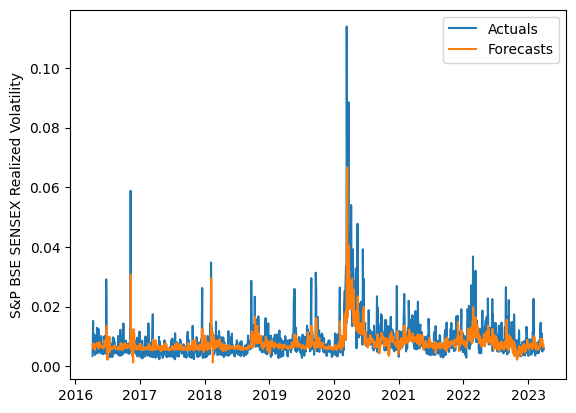

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
len(test)%3

1

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%3]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 7s 10ms/step - loss: 0.0705 - accuracy: 0.3165 - mean_absolute_error: 0.1885
Epoch 2/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0056 - accuracy: 0.4120 - mean_absolute_error: 0.0653
Epoch 3/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0035 - accuracy: 0.3533 - mean_absolute_error: 0.0524
Epoch 4/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.4179 - mean_absolute_error: 0.0475
Epoch 5/7
122/122 [==============================] - 1s 11ms/step - loss: 0.0025 - accuracy: 0.3963 - mean_absolute_error: 0.0433
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.4159 - mean_absolute_error: 0.0423
Epoch 7/7
18/18 [==============================] - 0s 3ms/step
Epoch 1/7
122/122 [==============================] - 7s 14ms/step - loss: 0.0676 - accuracy: 0.2844 - mean_absolute_error: 0.1818
Epoch 2/7
122/122 [========

In [ ]:
RMSE

[0.002807981352903259,
 0.002933167473781666,
 0.003113307531035794,
 0.003885761672245679,
 0.003099146531703998,
 0.002943901590640616,
 0.002879532098570104,
 0.002845312085439307,
 0.0029687189531110306,
 0.003297927451190081,
 0.0030361327749855137,
 0.00297534551494595,
 0.002909305180384849,
 0.002986201971134124,
 0.00340595167877038]

In [ ]:
Accuracy

[65.79372044446261,
 60.54098666048482,
 58.53551392569405,
 43.7367460789741,
 57.32811405189644,
 60.33495833847422,
 62.65977650705459,
 65.04262218526536,
 59.71503175984749,
 53.21993367144877,
 60.18191802404943,
 60.271695410381255,
 62.876078940215876,
 59.77572774039888,
 49.85580707830886]

In [ ]:
Quasilikelihood

[0.08499493780735738,
 0.10046594172152075,
 0.10994585932069807,
 0.160502729749043,
 0.1123366049931365,
 0.10173320818286771,
 0.09488540814568483,
 0.0892230892905303,
 0.10353509941264563,
 0.12561363273791493,
 0.10203281448082345,
 0.10097815927876007,
 0.09390551262123682,
 0.10274459208739088,
 0.13954568653176755]

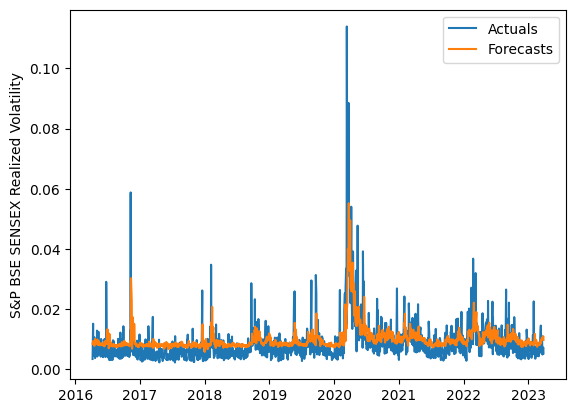

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%5]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 8s 14ms/step - loss: 0.0867 - accuracy: 0.2020 - mean_absolute_error: 0.2079
Epoch 2/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0069 - accuracy: 0.2154 - mean_absolute_error: 0.0737
Epoch 3/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0044 - accuracy: 0.1917 - mean_absolute_error: 0.0591
Epoch 4/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0033 - accuracy: 0.2102 - mean_absolute_error: 0.0500
Epoch 5/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 0.2115 - mean_absolute_error: 0.0447
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 0.2445 - mean_absolute_error: 0.0419
Epoch 7/7
11/11 [==============================] - 0s 3ms/step
Epoch 1/7
122/122 [==============================] - 8s 10ms/step - loss: 0.0363 - accuracy: 0.1989 - mean_absolute_error: 0.1363
Epoch 2/7
122/122 [========

In [ ]:
RMSE

[0.00312675061901351,
 0.002955222930010091,
 0.003324670325786314,
 0.003145627977246314,
 0.0034037045277998655,
 0.003227777589914379,
 0.003049719758639208,
 0.0031214261236254155,
 0.0037418687373493467,
 0.003054150187470668,
 0.003219014706932265,
 0.0033835303893569365,
 0.003288089787696839,
 0.0030541800905196444,
 0.003041280609952579]

In [ ]:
Accuracy

[58.76824112360279,
 63.611529901889426,
 51.96691013946325,
 56.18059950675972,
 51.26212445777594,
 55.080628478635255,
 58.78900682722976,
 56.64990699709463,
 45.10152637524412,
 59.9321261262314,
 55.562644061120224,
 51.34406679985919,
 53.93541428811122,
 59.56323970082998,
 61.03849532092907]

In [ ]:
Quasilikelihood

[0.11271054350536046,
 0.09518139846792596,
 0.13499701775446746,
 0.1179220857654853,
 0.1361105630764169,
 0.12209316093838073,
 0.10881726708877427,
 0.11497421949073582,
 0.15869323914146796,
 0.10726839664314171,
 0.12104564475804266,
 0.13678203946057998,
 0.12474867955057818,
 0.10694887678544213,
 0.10441943338009181]

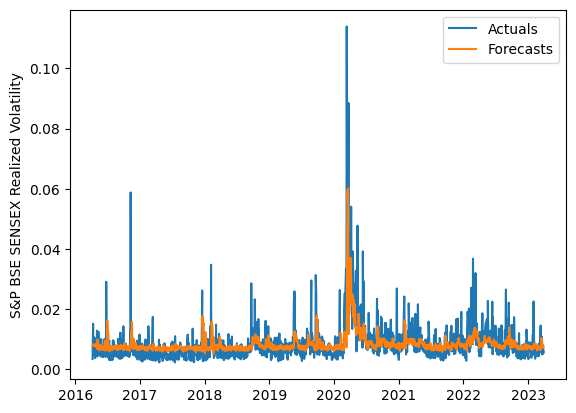

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%10]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 8s 10ms/step - loss: 0.0585 - accuracy: 0.1202 - mean_absolute_error: 0.1602
Epoch 2/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 0.0878 - mean_absolute_error: 0.0574
Epoch 3/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.0690 - mean_absolute_error: 0.0474
Epoch 4/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0026 - accuracy: 0.0630 - mean_absolute_error: 0.0436
Epoch 5/7
122/122 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 0.0821 - mean_absolute_error: 0.0407
Epoch 6/7
122/122 [==============================] - 2s 14ms/step - loss: 0.0020 - accuracy: 0.0785 - mean_absolute_error: 0.0389
Epoch 7/7
6/6 [==============================] - 0s 22ms/step
Epoch 1/7
122/122 [==============================] - 7s 11ms/step - loss: 0.0338 - accuracy: 0.0914 - mean_absolute_error: 0.1304
Epoch 2/7
122/122 [=========

In [ ]:
RMSE

[0.0032661776658158667,
 0.003685068106922983,
 0.0035792868517159873,
 0.0032960545743190277,
 0.0033697291361140546,
 0.0035645637871348137,
 0.0034369102704740564,
 0.003714245572287094,
 0.0034211753917481355,
 0.0034058300996645794,
 0.003688365343463149,
 0.0034457368157038227,
 0.003465520033577371,
 0.0033484349310156725,
 0.0036020410511881404]

In [ ]:
Accuracy

[54.873816533416516,
 45.542265264916296,
 47.1471165461892,
 54.65274842996366,
 52.57863350787879,
 47.20746483120497,
 51.146514128105366,
 45.932723242488436,
 51.42232416487191,
 52.02079084182626,
 45.73768964143725,
 51.11386867111768,
 50.764464655693374,
 53.08280201539335,
 47.70621334179448]

In [ ]:
Quasilikelihood

[0.12421895723279787,
 0.16094075056545734,
 0.15454595338650587,
 0.12438683379641155,
 0.13297539143897238,
 0.15586323323562343,
 0.13946946465974813,
 0.15862235072048078,
 0.13993008151912661,
 0.13552767271762908,
 0.1605952376430193,
 0.14038037193275446,
 0.14222860795058828,
 0.13246365734385981,
 0.1532348315042798]

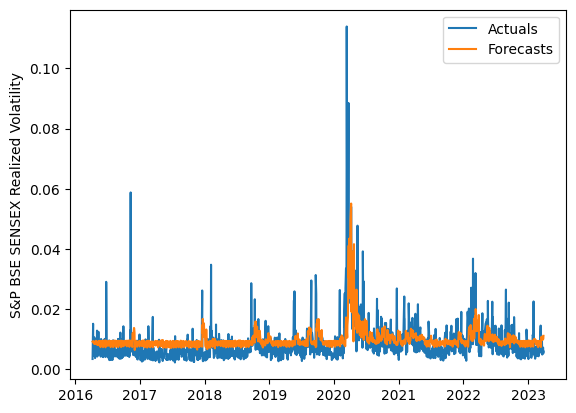

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 126
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%22]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 7s 9ms/step - loss: 0.0350 - accuracy: 0.1119 - mean_absolute_error: 0.1294
Epoch 2/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 0.0597 - mean_absolute_error: 0.0532
Epoch 3/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.0571 - mean_absolute_error: 0.0469
Epoch 4/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0026 - accuracy: 0.0633 - mean_absolute_error: 0.0436
Epoch 5/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 0.0494 - mean_absolute_error: 0.0417
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0021 - accuracy: 0.0633 - mean_absolute_error: 0.0404
Epoch 7/7
3/3 [==============================] - 0s 4ms/step
Epoch 1/7
122/122 [==============================] - 8s 10ms/step - loss: 0.0494 - accuracy: 0.0479 - mean_absolute_error: 0.1456
Epoch 2/7
122/122 [=============

3/3 [==============================] - 0s 5ms/step
Epoch 1/7
122/122 [==============================] - 7s 9ms/step - loss: 0.0511 - accuracy: 0.0445 - mean_absolute_error: 0.1480
Epoch 2/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 0.1161 - mean_absolute_error: 0.0565
Epoch 3/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.0625 - mean_absolute_error: 0.0470
Epoch 4/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0376 - mean_absolute_error: 0.0427
Epoch 5/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.0185 - mean_absolute_error: 0.0407
Epoch 6/7
122/122 [==============================] - 1s 10ms/step - loss: 0.0021 - accuracy: 0.0232 - mean_absolute_error: 0.0396
Epoch 7/7
122/122 [==============================] - 2s 13ms/step - loss: 0.0020 - accuracy: 0.0188 - mean_absolute_error: 0.0385


3/3 [==============================] - 0s 6ms/step
Epoch 1/7
122/122 [==============================] - 7s 9ms/step - loss: 0.0393 - accuracy: 0.0468 - mean_absolute_error: 0.1336
Epoch 2/7
122/122 [==============================] - 1s 12ms/step - loss: 0.0039 - accuracy: 0.0473 - mean_absolute_error: 0.0538
Epoch 3/7
122/122 [==============================] - 2s 13ms/step - loss: 0.0029 - accuracy: 0.0558 - mean_absolute_error: 0.0467
Epoch 4/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0885 - mean_absolute_error: 0.0441
Epoch 5/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.0594 - mean_absolute_error: 0.0420
Epoch 6/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.0502 - mean_absolute_error: 0.0411
Epoch 7/7
3/3 [==============================] - 0s 4ms/step
Epoch 1/7
122/122 [==============================] - 7s 13ms/step - loss: 0.0321 - accuracy: 0.0525 - mean_absol

In [ ]:
RMSE

[0.0035845595952662414,
 0.0038556442423763946,
 0.004091787657076738,
 0.003996261649596782,
 0.0036315556186762477,
 0.003785868530062691,
 0.003271307627246669,
 0.0037306912937757966,
 0.0038054838081825995,
 0.0038200749206155084,
 0.0036473961565437864,
 0.0034519109983735803,
 0.0039034026832508112,
 0.0037959783141005604,
 0.0035802225362736033]

In [ ]:
Accuracy

[47.87570225221972,
 44.34748853532574,
 37.64350408932575,
 40.49383766227537,
 49.333734280111486,
 44.86705278285871,
 56.02573542847025,
 45.13464757470573,
 44.494624668449866,
 45.37986417365494,
 47.55639534765488,
 50.20714494890228,
 42.33958978957286,
 45.3248755598532,
 48.86641642825127]

In [ ]:
Quasilikelihood

[0.15111441738917616,
 0.16315240177381662,
 0.19480037900916866,
 0.18029091493452457,
 0.14608566446411533,
 0.16276230059778218,
 0.12031455259218993,
 0.16112971140537968,
 0.16308072761120196,
 0.15997760517863438,
 0.1521632585518877,
 0.14330956138813652,
 0.1745953982497793,
 0.16289089448489116,
 0.14764789188684346]

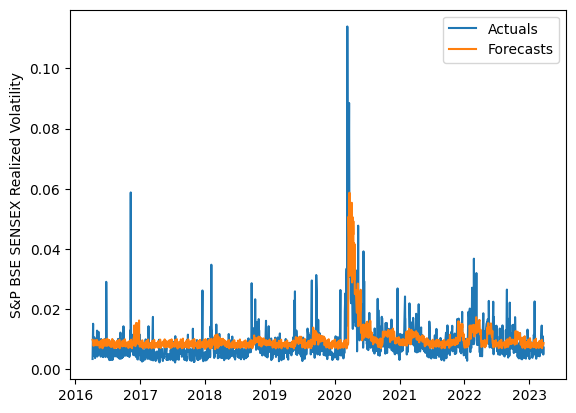

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])